In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
T_0 = 1.17
n = 6
T = np.array([0, 1.5, 3])

In [ ]:
T_int = 6 * T_0 + T
T_emk = 2.81 * T_0
T_a = 5.7 * T_0
tau = T_emk + T

In [ ]:
# v1.0
PI_T_i = (0.153 * (tau / T_a) + 0.362) * T_a
PI_K = 1 / (1.905 * (tau / T_a) + 0.826)
a = 0.25
PID_T_i = (0.186 * (tau / T_a) + 0.532) * T_a
PID_K = 1 / (1.552 * (tau / T_a) + 0.078)
T_d = a * PID_T_i
T_c = T_d / 8
(PI_T_i, PI_K), (PID_T_i, PID_K, T_d, T_c)

((array([2.9171961, 3.1466961, 3.3761961]),
  array([0.56653   , 0.45587025, 0.38137638])),
 (array([4.1594202, 4.4384202, 4.7174202]),
  array([1.18608658, 0.83879487, 0.64881794]),
  array([1.03985505, 1.10960505, 1.17935505]),
  array([0.12998188, 0.13870063, 0.14741938])))

In [ ]:
# v2.0
PI_T_i = (-0.467 * (tau / T_int) + 0.624) * T_int
PI_K = 1 / (4.345 * (tau / T_int) - 0.151)
a = 0.4
PID_T_i = (-0.150 * (tau / T_int) + 0.552) * T_int
PID_K = 1 / (2.766 * (tau / T_int) - 0.521)
T_d = a * PID_T_i
T_c = T_d / 8
(PI_T_i, PI_K), (PID_T_i, PID_K, T_d, T_c)

NameError: name 'tau' is not defined

In [12]:
T = np.array([0, 1.5, 3])
K_kr = np.array([1.18, 0.88, 0.745])
T_kr = np.array([12.8, 16.2, 19.5])
PI_K = K_kr * 0.45 + 0.1
PI_T_i = T_kr / 1.2 - 5
PID_K = K_kr * 0.6
PID_T_i = T_kr / 2
T_d = PID_T_i / 4
T_c = T_d / 8
(PI_T_i, PI_K), (PID_T_i, PID_K, T_d, T_c)

((array([ 5.66666667,  8.5       , 11.25      ]),
  array([0.631  , 0.496  , 0.43525])),
 (array([6.4 , 8.1 , 9.75]),
  array([0.708, 0.528, 0.447]),
  array([1.6   , 2.025 , 2.4375]),
  array([0.2      , 0.253125 , 0.3046875])))

In [ ]:
def get_inter(fs, x, y):
  fs = list(np.vectorize(eval("lambda x: " + f)) for f in fs)
  A = np.vstack([f(x) for f in fs]).T
  w = np.linalg.lstsq(A, y, rcond=None)[0]
  ft = np.vectorize(lambda x: np.sum(np.array([f(x) for f in fs]) * w))
  return ft

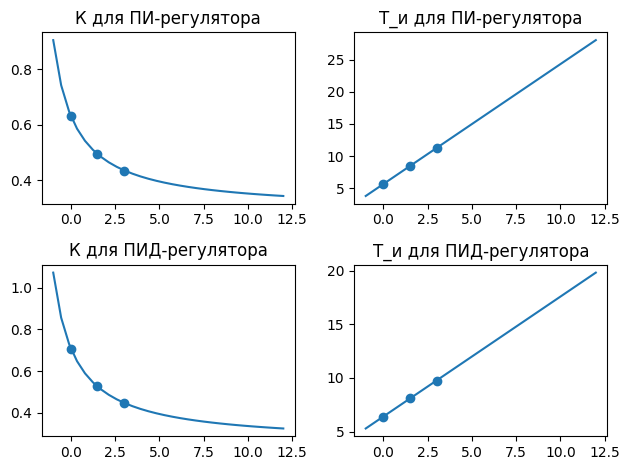

In [13]:
Tx = np.linspace(-1, 12, 30)
plt.subplot(221)
plt.tight_layout()
plt.scatter(T, PI_K)
PI_K_f = get_inter(["1", "1 / (x / 2.25 + 1)"], T, PI_K)
plt.plot(Tx, PI_K_f(Tx))
plt.title("К для ПИ-регулятора")
#   plt.plot(Tx, get_inter(["x**5","x**3", "x**2", "x", "1"], T, PI_K)(Tx))
plt.subplot(222)
plt.tight_layout()
plt.scatter(T, PI_T_i)
PI_T_i_f = get_inter(["x", "1"], T, PI_T_i)
plt.plot(Tx, PI_T_i_f(Tx))
plt.title("Т_и для ПИ-регулятора")
plt.subplot(223)
plt.tight_layout()
plt.scatter(T, PID_K)
PID_K_f = get_inter(["1 / (x / 2.25 + 1)", "1"], T, PID_K)
plt.plot(Tx, PID_K_f(Tx))
plt.title("К для ПИД-регулятора")
# plt.plot(Tx, get_inter(["x**2", "x", "1"], T, PID_K)(Tx))
plt.subplot(224)
plt.tight_layout()
plt.scatter(T, PID_T_i)
PID_T_i_f = get_inter(["x", "1"], T, PID_T_i)
plt.plot(Tx, PID_T_i_f(Tx))
plt.title("Т_и для ПИД-регулятора")
plt.show()

# $K = A * \frac{1}{\frac{x}{2.25} + 1} + C$

# $T_и = A*x + C$

In [14]:
T = np.array([5, 8, 12])
K_kr = np.array([0.655, 0.595, 0.543])
T_kr = np.array([23.7, 30, 37.7])

In [15]:
PI_integral = np.array([17.7, 22.6, 36.6])
PI_pred_integral = np.array([19.5, 26.2, 35])
PI_K = K_kr * 0.45 + 0.1
PI_T_i = T_kr / 1.2 - 5
PI_K_predicted = PI_K_f(T)
PI_T_i_predicted = PI_T_i_f(T)
df = pd.DataFrame(np.array([T, PI_K, PI_K_predicted, PI_T_i, PI_T_i_predicted, PI_integral, PI_pred_integral]).T, columns=["T", "K", "K предсказанное", "T_и", "T_и предсказанное", "Интеграл", "Интеграл предсказания"])
df

,T,K,K предсказанное,T_и,T_и предсказанное,Интеграл,Интеграл предсказания
0,5.0,0.39475,0.395753,14.750000,14.986111,17.7,19.5
1,8.0,0.36775,0.364719,20.000000,20.569444,22.6,26.2
2,12.0,0.34435,0.343666,26.416667,28.013889,36.6,35.0


In [16]:
PID_integral = np.array([13.5, 16.9, 25.6])
PID_pred_integral = np.array([16.4, 22.5, 29.8])
PID_K = K_kr * 0.6
PID_T_i = T_kr / 2
PID_K_predicted = PID_K_f(T)
PID_T_i_predicted = PID_T_i_f(T)
df = pd.DataFrame(np.array([T, PID_K, PID_K_predicted, PID_T_i, PID_T_i_predicted, PID_integral, PID_pred_integral]).T, columns=["T", "K", "K предсказанное", "T_и", "T_и предсказанное", "Интеграл", "Интеграл предсказания"])
df

,T,K,K предсказанное,T_и,T_и предсказанное,Интеграл,Интеграл предсказания
0,5.0,0.3930,0.394338,11.85,11.991667,13.5,16.4
1,8.0,0.3570,0.352958,15.00,15.341667,16.9,22.5
2,12.0,0.3258,0.324888,18.85,19.808333,25.6,29.8
